The nonlinear equations are:

$\partial_t \mathbf{u} + \mathbf{u} \cdot \nabla \mathbf{u} - 2\Omega_0 \mathbf{\hat{z}} \times \mathbf{u} - q\Omega_0 u_x \mathbf{\hat{y}} - C\mathbf{b} \cdot \nabla\mathbf{b} - CB_0\partial_z\mathbf{b} = -\nabla\varpi + \frac{1}{R}\nabla^2\mathbf{u}$

$\partial_t\mathbf{b} + \mathbf{u} \cdot \nabla \mathbf{b} - \mathbf{b}\cdot\nabla\mathbf{u} + q\Omega_0b_x\mathbf{\hat{y}} - B_0\partial_z\mathbf{u} = \frac{1}{R_m}\nabla^2\mathbf{b}$

Plus incompressibility and the solenoidal magnetic field constraint:

$\nabla \cdot \mathbf{u} = 0$ and $\nabla \cdot \mathbf{b} = 0$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from sympy.interactive import printing
printing.init_printing(use_latex=True)


In [2]:
import sympy
print(sympy.__version__)

0.7.5


In [3]:
R, Rm, kx, ky, kz, omega, q, B0, Co = symbols("R R_m k_x k_y k_z Omega_0 q B_0 C", real=True)
s = symbols("s",)

The linearized equations are as follows:

$\left(s + \frac{1}{R}\left(k_x^2+k_z^2\right)\right)u_x - 2\Omega_0u_y - iCB_0k_zb_x + iCB_0k_xb_z + ik_x\varpi = 0$

$\Omega_0\left(2-q\right)u_x + \left(s + \frac{1}{R}\left(k_x^2+k_z^2\right)\right)u_y - iCB_0k_zb_y = 0$ 

$\left(s + \frac{1}{R}\left(k_x^2+k_z^2\right)\right)u_z - iCB_0k_zb_z + ik_z\varpi = 0$

$-iB_0k_zu_x + \left(s + \frac{1}{R_m}\left(k_x^2+k_z^2\right)\right)b_x = 0$

$-iB_0k_zu_y + \Omega_0qb_x + \left(s + \frac{1}{R_m}\left(k_x^2+k_z^2\right)\right)b_y = 0$

$-iB_0k_zu_z + \left(s + \frac{1}{R_m}\left(k_x^2+k_z^2\right)\right)b_z = 0$

Along with the two constraints:

$ik_xu_x + ik_zu_z = 0$

$ik_xb_x + ik_zb_z = 0$

But we ignore the second constraint for now.

The state vector is:
$\mathbf{x} = \left[u_x, u_y, u_z, b_x, b_y, b_z, \varpi \right]^{T}$

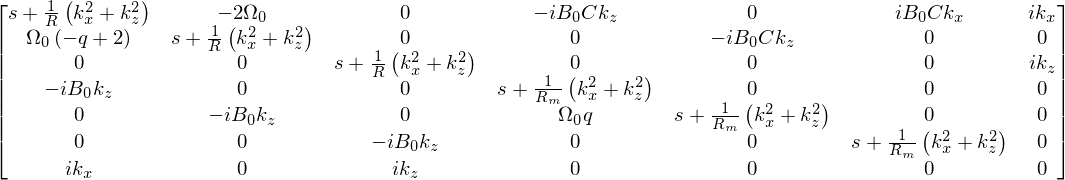

In [4]:
M = Matrix([[s+(1/R)*(kx**2+kz**2), -2*omega, 0, -I*Co*B0*kz, 0, I*B0*Co*kx, I*kx],
            [omega*(2-q), s+(1/R)*(kx**2+kz**2), 0, 0, -I*Co*B0*kz, 0, 0],
            [0, 0, s+(1/R)*(kx**2+kz**2), 0, 0, 0, I*kz],
            [-I*B0*kz, 0, 0, s+(1/Rm)*(kx**2+kz**2), 0, 0, 0],
            [0, -I*B0*kz, 0, q*omega, s + (1/Rm)*(kx**2+kz**2), 0, 0],
            [0, 0, -I*B0*kz, 0, 0, s+(1/Rm)*(kx**2 + kz**2), 0],
            [I*kx, 0, I*kz, 0, 0, 0, 0]])
M

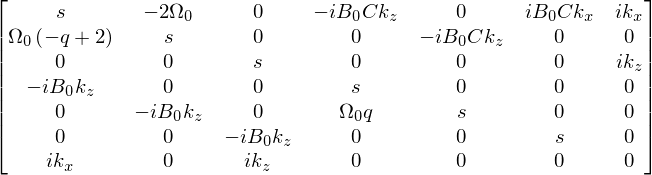

In [5]:
MM = Matrix([[s, -2*omega, 0, -I*Co*B0*kz, 0, I*B0*Co*kx, I*kx],
            [omega*(2-q), s, 0, 0, -I*Co*B0*kz, 0, 0],
            [0, 0, s, 0, 0, 0, I*kz],
            [-I*B0*kz, 0, 0, s, 0, 0, 0],
            [0, -I*B0*kz, 0, q*omega, s, 0, 0],
            [0, 0, -I*B0*kz, 0, 0, s, 0],
            [I*kx, 0, I*kz, 0, 0, 0, 0]])
MM

In [6]:
ddd = MM.det()
sim = ddd.subs(kx, 0)

In [7]:
dd = M.det()

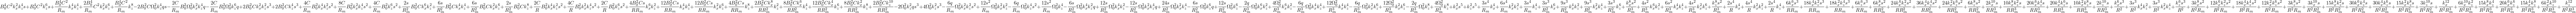

In [8]:
dd

In [9]:
Infinity = oo

In [10]:
aa = dd.subs(R, oo).subs(Rm, oo)
simplify(aa)

In [11]:
#Umurhan+ a4 term
jj = (Co/(Rm*Co)**4)*((kx**2+kz**2)*Co*(((Co*Rm/R)*(kx**2 + kz**2)**2 + kz**2*Rm**2*Co**2)**2) + 2*(2-q)*Rm**2*Co**3*(kx**2+kz**2)**2*kz**2 - 2*q*Rm**4*Co**4*kz**4)
jj.expand().subs(Rm, Infinity).subs(R, Infinity)

In [12]:
(simplify(aa.subs(B0, 1).subs(omega, 1))/s).subs(s,0)

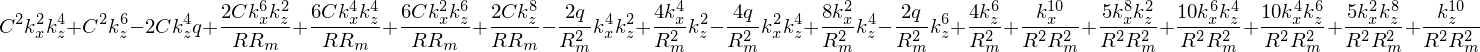

In [13]:
coeff = 1/(Rm*s+kx**2+kz**2)*Rm
d1 = factor(dd)*coeff
a4 = expand(d1).subs(s,0).subs(B0, 1).subs(omega, 1)
a4

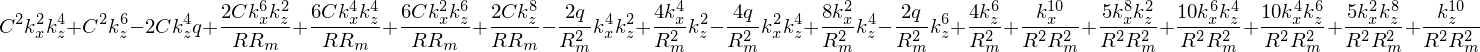

In [14]:
expand(jj)

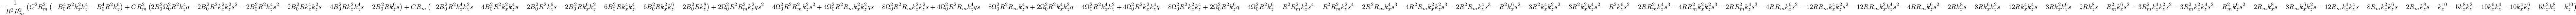

In [15]:
collect(d1, Rm*Co)

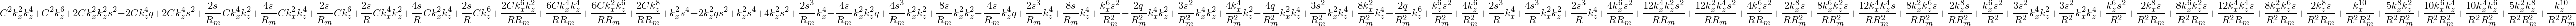

In [16]:
#d1 is the dispersion relation (with one power of s factored out)
disp = expand(d1).subs(B0, 1).subs(omega, 1)
disp

In [17]:
#Rm = 4.9
#Co = 0.08
#R = Rm/0.001 #Pm = Rm/R 
#q = 3/2
func = lambdify((kx, Rm, Co, R, q), disp)
plotb = lambdify((kx, Co, R, q), disp)

In [18]:
a1 = func(0, 4.9, 0.08, 4.9/0.001, 3/2)
a2 = func(0, 5.3, 0.08, 5.3/0.001, 3/2)
a3 = func(0, 4.6, 0.08, 4.6/0.001, 3/2)

In [19]:
gr1 = lambdify(kz, a1)
gr2 = lambdify(kz, a2)
gr3 = lambdify(kz, a3)

In [20]:
print(gr1(1.5))
print(gr2(1.5))
print(gr3(1.5))
solve(gr3(1.5))

2.25*s**4 + 2.06839285714286*s**3 + 3.53630982468242*s**2 + 2.43907336479963*s - 0.667517408300323
2.25*s**4 + 1.91228773584906*s**3 + 3.46712705199804*s**2 + 2.25493379162203*s - 0.736449317270659
2.25*s**4 + 2.20328804347826*s**3 + 3.60046308556829*s**2 + 2.59820593788847*s - 0.603596769839751


In [21]:
kk = np.arange(0.05, 2, 0.05)
out1 = np.zeros((len(kk), 4), np.complex)
out2 = np.zeros((len(kk), 4), np.complex)
out3 = np.zeros((len(kk), 4), np.complex)
for i in range(len(kk)):
    hh1 = solve(gr1(kk[i]))
    out1[i, 0] = hh1[0]
    out1[i, 1] = hh1[1]
    out1[i, 2] = hh1[2]
    out1[i, 3] = hh1[3]
    
    #hh2 = solve(gr2(kk[i]))
    #out2[i, 0] = hh2[0]
    #out2[i, 1] = hh2[1]
    #out2[i, 2] = re(hh2[2])
    #out2[i, 3] = re(hh2[3])
    
    #hh3 = solve(gr3(kk[i]))
    #out3[i, 0] = hh3[0]
    #out3[i, 1] = hh3[1]
    #out3[i, 2] = re(hh3[2])
    #out3[i, 3] = re(hh3[3])

In [22]:
out1[0]

array([ -2.49916450e-02+0.j        ,   2.39720504e-02+0.j        ,
        -9.16982990e-07-1.00049956j,  -9.16982990e-07+1.00049956j])

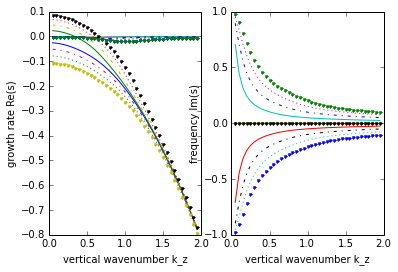

In [52]:
ax = plt.subplot(121)
ax.plot(kk, out1[:, 0].real)
ax.plot(kk, out1[:, 1].real, '-.')
ax.plot(kk, out1[:, 2].real, ':')
ax.plot(kk, out1[:, 3].real, '.')

#plt.plot(kk, out2[:, 0], color='red')
#plt.plot(kk, out2[:, 1], '-.',color='red')
#plt.plot(kk, out2[:, 2], ':',color='red')
#plt.plot(kk, out2[:, 3], '.',color='red')

#plt.plot(kk, out3[:, 0], color='black')
#plt.plot(kk, out3[:, 1], '-.',color='black')
#plt.plot(kk, out3[:, 2], ':',color='black')
#plt.plot(kk, out3[:, 3], '.',color='black')
ax.set_xlabel('vertical wavenumber k_z')
ax.set_ylabel('growth rate Re(s)')

ax = plt.subplot(122)
ax.plot(kk, out1[:, 0].imag)
ax.plot(kk, out1[:, 1].imag, '-.')
ax.plot(kk, out1[:, 2].imag, ':')
ax.plot(kk, out1[:, 3].imag, '.')

ax.set_xlabel('vertical wavenumber k_z')
ax.set_ylabel('frequency Im(s)')
#plt.ylim(-.1, .04)

In [24]:
xz1 = lambdify((kx,kz,Rm, Co, R, q),disp)

In [25]:
%%time
kx = np.arange(0.05, 2, 0.05)
kz = np.arange(0.05, 2, 0.05)

out1 = np.zeros((len(kz), len(kx), 4), np.complex)
for i in range(len(kz)):
    for j in range(len(kx)):
        hh1 = solve(xz1(kz[i],kx[j],4.9, 0.08, 4.9/0.001, 3/2))
        out1[i, j, 0] = hh1[0]
        out1[i, j, 1] = hh1[1]
        out1[i, j, 2] = hh1[2]
        out1[i, j, 3] = hh1[3]

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs


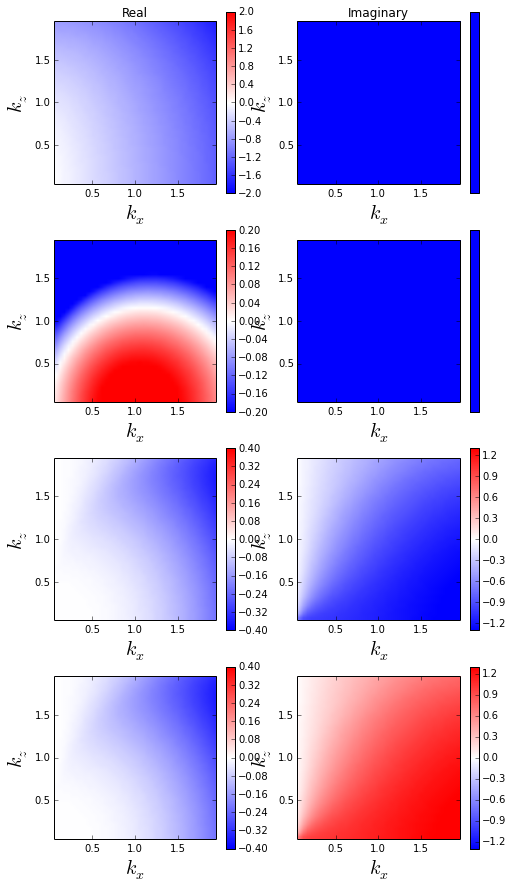

In [41]:
plt_extent = [kx.min(),kx.max(),kz.min(),kz.max()]
fig = plt.figure(figsize=(8,15))

ax = fig.add_subplot(421)
im = ax.imshow(out1[:,:,0].real,vmin=-2,vmax=2,extent=plt_extent,cmap='bwr',origin='lower')
ax.set_title("Real")
fig.colorbar(im)
ax = fig.add_subplot(422)
im = ax.imshow(out1[:,:,0].imag,extent=plt_extent,cmap='bwr',origin='lower')
ax.set_title("Imaginary")
fig.colorbar(im)
ax = fig.add_subplot(423)
im = ax.imshow(out1[:,:,1].real,vmin=-0.2,vmax=0.2,extent=plt_extent,cmap='bwr',origin='lower')
fig.colorbar(im)
ax = fig.add_subplot(424)
im = ax.imshow(out1[:,:,1].imag,extent=plt_extent,cmap='bwr',origin='lower')
fig.colorbar(im)

ax = fig.add_subplot(425)
im = ax.imshow(out1[:,:,2].real,vmin=-0.4,vmax=0.4,extent=plt_extent,cmap='bwr',origin='lower')
fig.colorbar(im)

ax = fig.add_subplot(426)
im = ax.imshow(out1[:,:,2].imag,vmin=-1.3,vmax=1.3,extent=plt_extent,cmap='bwr',origin='lower')
fig.colorbar(im)

ax = fig.add_subplot(427)
im = ax.imshow(out1[:,:,3].real,vmin=-0.4,vmax=0.4,extent=plt_extent,cmap='bwr',origin='lower')
fig.colorbar(im)

ax = fig.add_subplot(428)
im = ax.imshow(out1[:,:,3].imag,vmin=-1.3,vmax=1.3,extent=plt_extent,cmap='bwr',origin='lower')
fig.colorbar(im)

for ax in fig.axes[::2]:
    ax.set_xlabel(r"$k_x$",size=20)
    ax.set_ylabel(r"$k_z$",size=20)


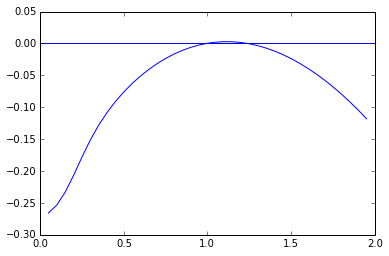

In [40]:
plt.plot(kx,out1[22,:,1].real)
plt.axhline(0)

## Search for degenerate modes

Since there are two modes which are purely real, and two which are complex, I'll just look for degenerate modes by taking the absolute value of the difference between the two real ones and the two complex ones.

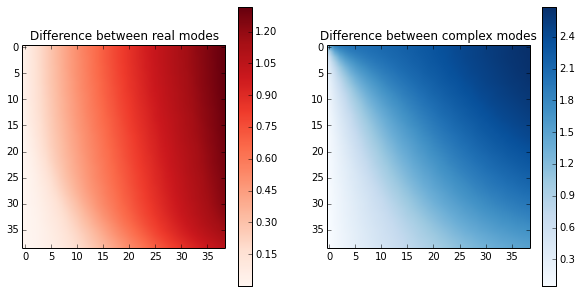

In [51]:
fig = plt.figure(figsize=(10,5))
ax= fig.add_subplot(121)
im = ax.imshow(np.abs(out1[:,:,0]-out1[:,:,1]),cmap='Reds')
ax.set_title("Difference between real modes")
fig.colorbar(im)
ax = fig.add_subplot(122)
im = ax.imshow(np.abs(out1[:,:,2]-out1[:,:,3]),cmap='Blues')
ax.set_title("Difference between complex modes")
fig.colorbar(im)

In [ ]:
ee = lambdify((kz, Rm), gg)
solve(ee(0.75, 5))

In [ ]:
sol1 = np.zeros((len(kk), 3), np.float_)
sol2 = np.zeros((len(kk), 3), np.float_)

for i in xrange(len(kk)):
    hh = solve(ee(kk[i]))
    sol1[i, 0] = hh[0]
    sol1[i, 1] = hh[1]

In [ ]:
plt.plot(kk, sol1[:, 1])

In [ ]:
mat = M.subs(B0, 1).subs(omega, 1).subs(kx, 0).subs(q, 3/2).subs(Co, 0.08).subs(Rm, 4.9).subs(R, 4.9/0.001)

In [ ]:
out = np.zeros(len(kk))
for i in xrange(len(kk)):
    jj = solve(mat.subs(kz, kk[i]).det())
    print jj
    out[i] = jj[0]

In [ ]:
plt.plot(kk, out, color='red')

In [ ]:
re?